<img src="./images/happiness_report_2023.png" width="400" style="margin-left:0">

In [4]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')

happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [7]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [8]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [9]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [12]:
happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(happiness_df['healthy_life_expectancy'].mean())

In [13]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [16]:
!pip install seaborn

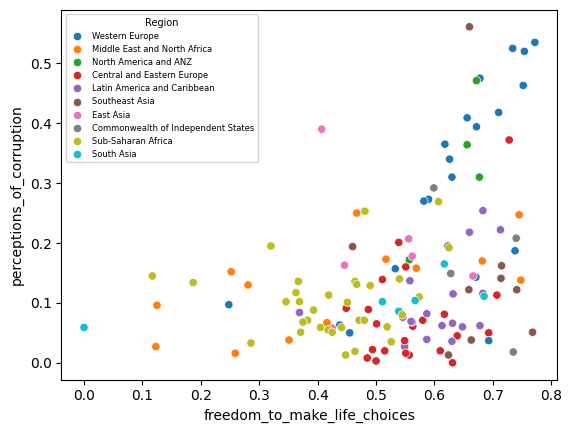

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x='freedom_to_make_life_choices',
    y='perceptions_of_corruption',
    data=happiness_df,
    hue='region'
)
plt.legend(title='Region', fontsize=6, title_fontsize=7)
plt.show()

In [41]:
import numpy as np
from scipy.stats import iqr

happiness_Q1 = np.percentile(happiness_df['gdp_per_capita'], 25)
happiness_Q3 = np.percentile(happiness_df['gdp_per_capita'], 75)

iqr_value = iqr(happiness_df['gdp_per_capita'])
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

0.6990000000000001
정상치 범위: 0.05049999999999977 ~ 2.8465000000000003


In [42]:
condition1 = happiness_df['gdp_per_capita'] >= lower_bound
condition2 = happiness_df['gdp_per_capita'] <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


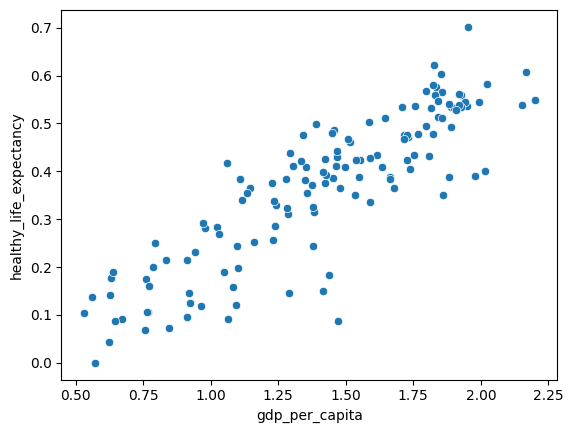

In [43]:
sns.scatterplot(x='gdp_per_capita', y='healthy_life_expectancy', data=happiness_df)
plt.show()

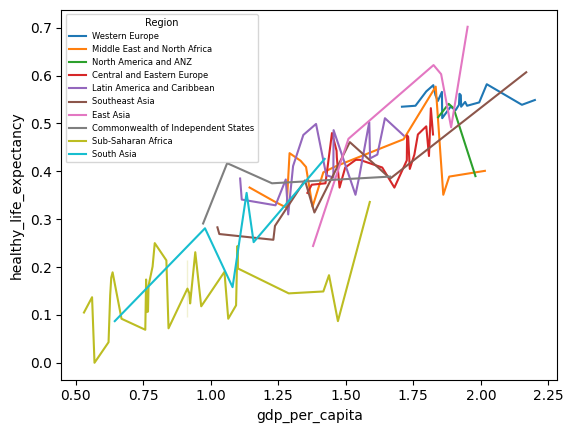

In [49]:
sns.lineplot(data=happiness_df, x='gdp_per_capita', y='healthy_life_expectancy', hue='region')
plt.legend(title='Region', fontsize=6, title_fontsize=7)
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_1512\4210220111.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


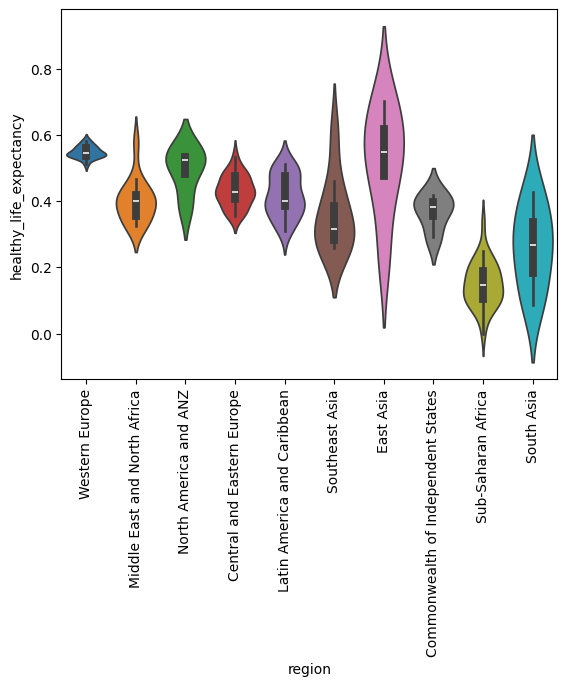

In [52]:
line = sns.violinplot(x='region', y='healthy_life_expectancy', data=happiness_df, hue='region')
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()
